<a href="https://colab.research.google.com/github/jacobcperez15/multiclass-risk-classifier/blob/master/LIRiskClassJupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#need to add to requirements.txt
#!pip install missingno

In [ ]:
#adding new package for balanced metrics, need to add to requirements.txt
#!pip install imblearn

In [ ]:
# import relevant libraries
import warnings
warnings.simplefilter('ignore')
from pprint import pprint
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, log_loss
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [ ]:
# Load the training data
data = pd.read_csv('train.csv')
# check if everything loaded properly
data.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# get high level descriptive stats
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [ ]:
# remove the training labels from the training data
training_data = data.drop(['Response','Id'], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
59376,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,...,0,0,0,0,0,0,0,0,0,0
59377,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,...,0,0,0,0,0,0,0,0,0,0
59378,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,...,0,0,0,0,0,0,0,0,0,0
59379,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,...,0,1,0,0,0,0,0,0,0,0
59380,1,A8,26,0.076923,2,3,1,0.447761,0.781818,0.382845,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# use get dummies method to turn categorical data into numeric
product_info_2_dummies = pd.get_dummies(training_data['Product_Info_2'])
product_info_2_dummies.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
59376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
59377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59380,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop the original categorical column
training_data = training_data.drop(['Product_Info_2'], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,0,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,0,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,0
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,1,0,0,0,0,0,0,0,0
59380,1,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# add dummy df to training_data df
training_data = pd.concat([training_data, product_info_2_dummies], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,1,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,1,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,1
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,0,0,0,0,0,1,0,0,0
59380,1,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create a variable for the response classes / labels
response = data['Response']
response.tail()

59376    4
59377    7
59378    8
59379    8
59380    7
Name: Response, dtype: int64

In [ ]:
#check for data imbalances
classes_count = response.value_counts()
classes_count

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [ ]:
# identify which columns should be dropped due to over 30% missing data

'''training_data.isnull().sum()/len(data)*100''' #updated this bug

percent_missing = training_data.isnull().sum()/len(training_data)*100
print(percent_missing[percent_missing > 0.3].sort_values(ascending=False))

Medical_History_10     99.061990
Medical_History_32     98.135767
Medical_History_24     93.598963
Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
dtype: float64


In [ ]:
# create a training set that dropped all columns w/missing data before imputing missing values
drop_any_na_col_data = training_data.dropna(axis=1, how='any')
drop_any_na_col_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.018895,0.004800,0.002694,0.005153,0.003688,0.110372,0.105859,0.241171,0.182078,0.044577
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.136155,0.069113,0.051839,0.071601,0.060618,0.313356,0.307659,0.427798,0.385912,0.206374
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# drop the columns with >30% of missing data

'''training_data = training_data.dropna(axis=1, thresh=17814)''' #human error

training_data = training_data.dropna(axis=1, thresh=41566)
training_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.018895,0.004800,0.002694,0.005153,0.003688,0.110372,0.105859,0.241171,0.182078,0.044577
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.136155,0.069113,0.051839,0.071601,0.060618,0.313356,0.307659,0.427798,0.385912,0.206374
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# identify which columns still have missing data
na_col_list = training_data.columns[training_data.isnull().any()].tolist()
na_col_list

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Medical_History_1']

In [ ]:
# view remaining columns with missing data
na_cols = training_data[na_col_list]
na_cols

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Medical_History_1
0,0.028,0.00000,NaN,4.0
1,0.000,0.00000,0.0018,5.0
2,0.030,0.00000,0.0300,10.0
3,0.042,0.00000,0.2000,0.0
4,0.027,0.00000,0.0500,NaN
...,...,...,...,...
59376,0.020,0.00000,0.0250,0.0
59377,0.100,0.00001,0.3500,24.0
59378,0.035,0.00000,NaN,NaN
59379,0.038,NaN,NaN,0.0


<AxesSubplot:>

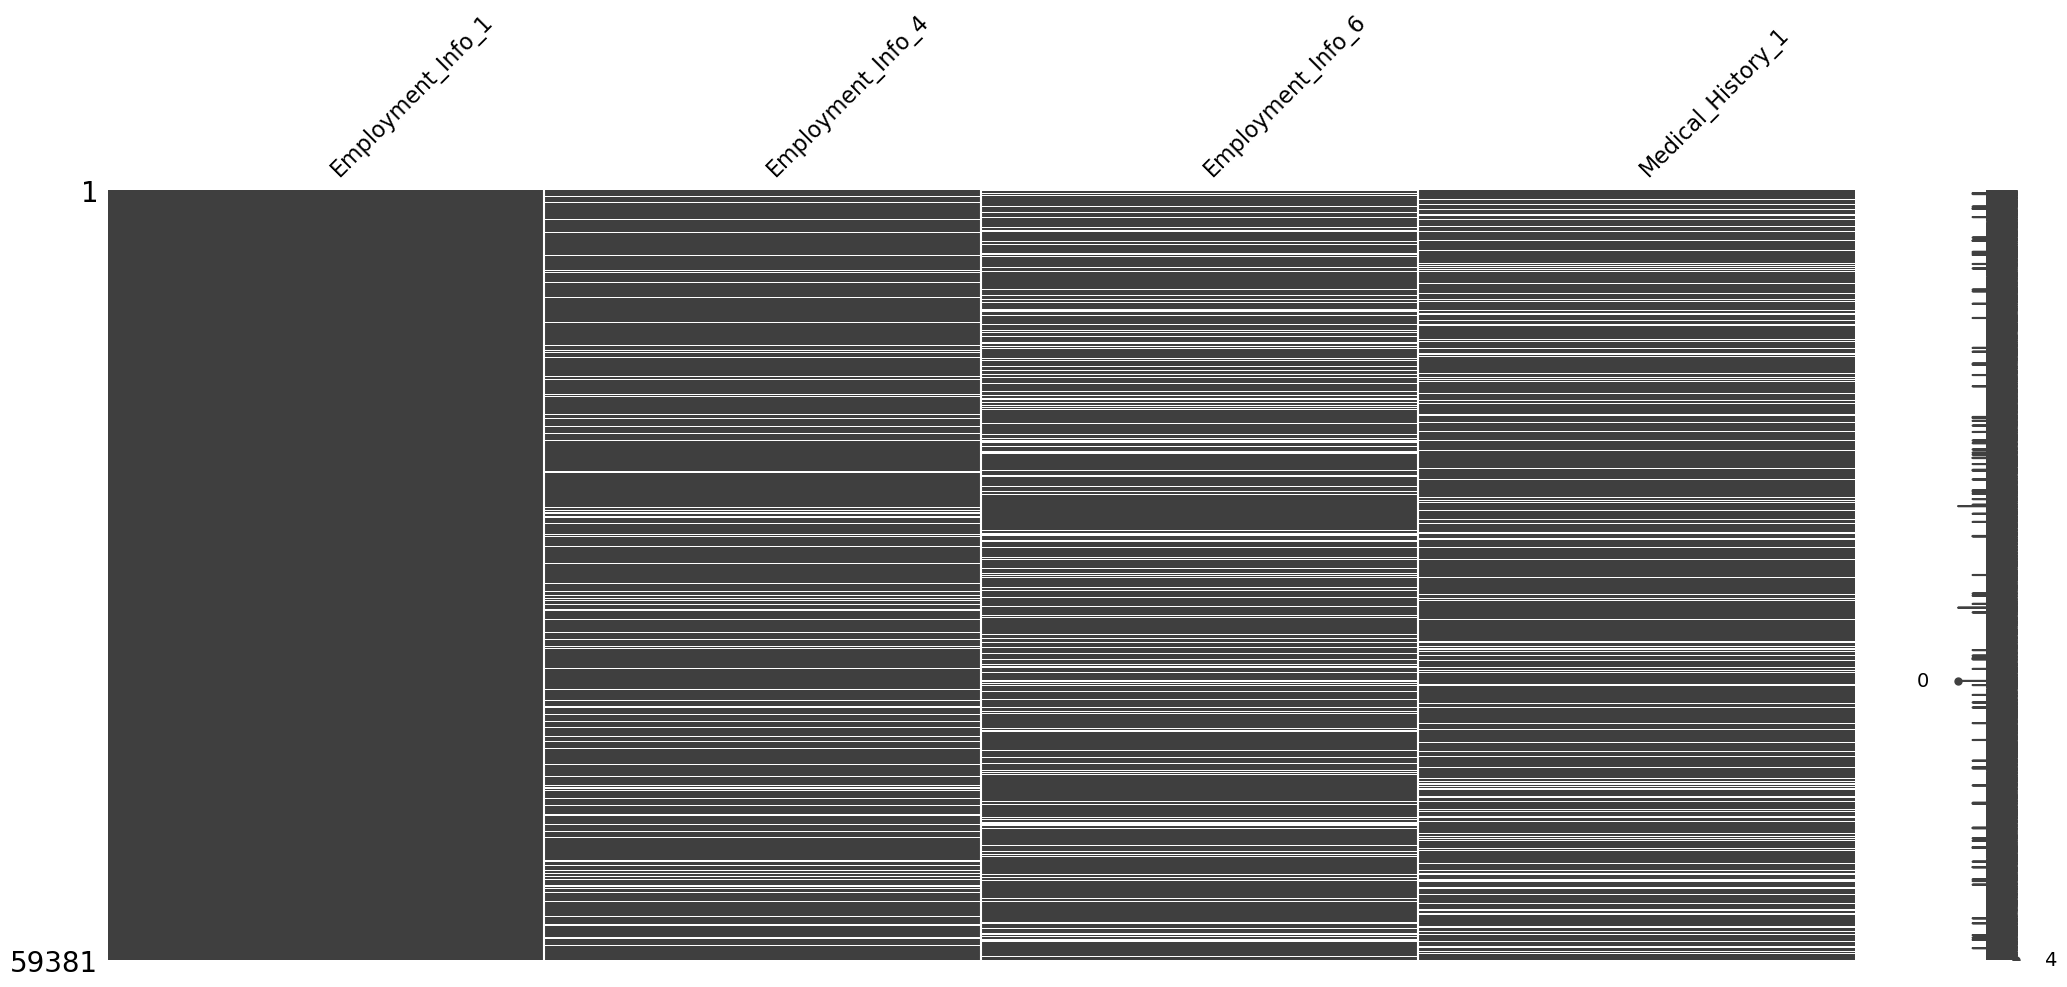

In [ ]:
# plot the distribution of the columns w/missing data
%matplotlib inline
msno.matrix(na_cols)

In [ ]:
'''
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(training_data)
imputed_data = imr.transform(training_data.values)
imputed_data''' #bug, code updates

#update: use simple imputer to fill missing values with the mean (updated from using median)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(training_data)
imputed_data = imputer.transform(training_data)
imputed_data

array([[ 1.        , 10.        ,  0.07692308, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 10.        ,  0.23076923, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# using imputed_data, create a train/test split to evaluate how well a trained model performs on unseen data
X_train, X_test, Y_train, Y_test = train_test_split(imputed_data, response, test_size=0.20, random_state=0)

# transform the training data via standardization
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()

  # Get the confusion matrices for train and test
  #train_cm = confusion_matrix(Y_train,train_class_preds)
  #test_cm = confusion_matrix(Y_test,test_class_preds )

  #print('Train confusion matrix:')
  #print( train_cm)
  #print()
  #print('Test confusion matrix:')
  #print(test_cm)
  #print()

# Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds, average='micro')
  precision = precision_score(Y_test, test_class_preds, average='micro')
  recall = recall_score(Y_test, test_class_preds, average='micro')


  #R2 score on train and test data
  #train_log = log_loss(Y_train,train_preds)
  #test_log = log_loss(Y_test, test_preds)

  #print('Train log loss:', train_log)
  #print('Test log loss:', test_log)
  #print()
  #print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_accuracy, test_accuracy,f1, precision,recall #, train_log, test_log, train_auc, test_auc,

In [ ]:
# create a base classifier used to evaluate a subset of attributes
lr = LogisticRegression(random_state=0,
                        solver='lbfgs',
                        max_iter = 1000, #added max iter to remove errors
                        multi_class='multinomial')

lr.fit(X_train,Y_train)
print('Training accuracy:', lr.score(X_train,Y_train))
print('Test accuracy:', lr.score(X_test, Y_test))

Training accuracy: 0.5011367463792523
Test accuracy: 0.4968426370295529


In [ ]:
y_pred = lr.predict(X_test)

print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.346
Precision: 0.466
F1: 0.464
Recall: 0.497


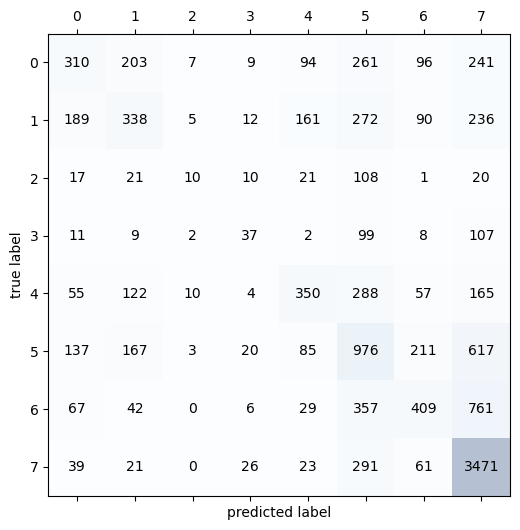

In [ ]:
confmat = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#switch to random forest algo
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

rf_model = RandomForestClassifier(criterion='entropy',
                            n_estimators=1000,
                            random_state=0,
                            n_jobs=-1)

rf_model.fit(X_train, Y_train)

print('Training accuracy:', rf_model.score(X_train, Y_train))
print('Test accuracy:', rf_model.score(X_test, Y_test))

Training accuracy: 1.0
Test accuracy: 0.5364991159383683


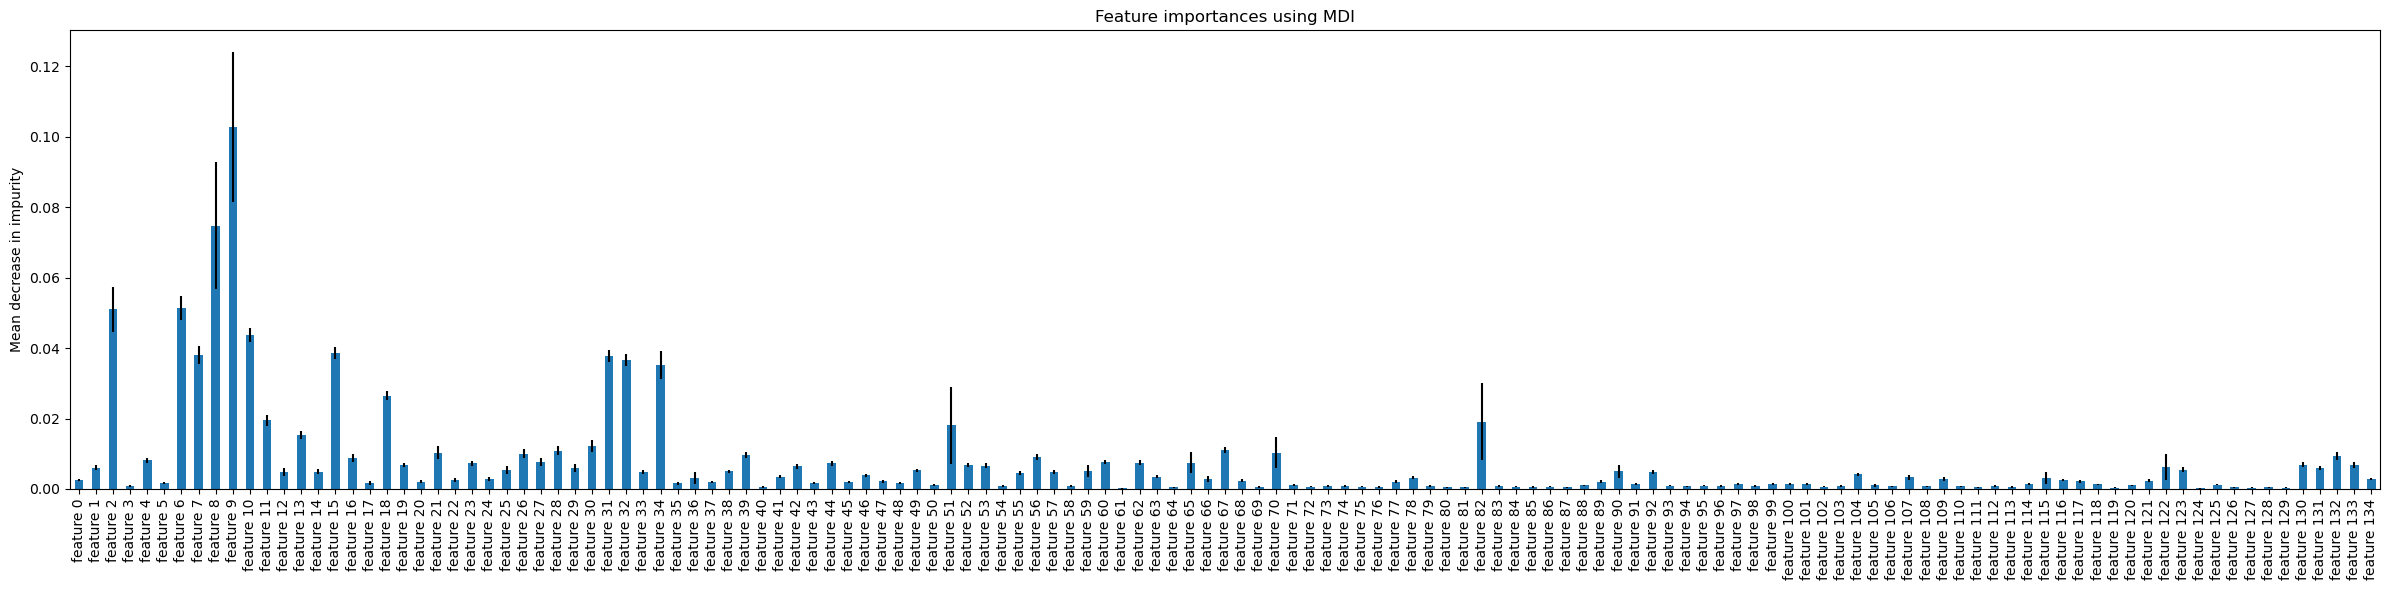

In [ ]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(24,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
importances = rf_model.feature_importances_
#feat_labels = training_data.columns[1:]

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f" % (f + 1, 30,
                           feature_names[f],
                           importances[indices[f]]))

 1 feature 0                      0.102811
 2 feature 1                      0.074735
 3 feature 2                      0.051340
 4 feature 3                      0.051076
 5 feature 4                      0.043718
 6 feature 5                      0.038682
 7 feature 6                      0.037952
 8 feature 7                      0.037664
 9 feature 8                      0.036589
10 feature 9                      0.035211
11 feature 10                     0.026528
12 feature 11                     0.019492
13 feature 12                     0.019120
14 feature 13                     0.018027
15 feature 14                     0.015285
16 feature 15                     0.012317
17 feature 16                     0.010930
18 feature 17                     0.010825
19 feature 18                     0.010284
20 feature 19                     0.010212
21 feature 20                     0.009963
22 feature 21                     0.009570
23 feature 22                     0.009279
24 feature 

In [ ]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.4s


[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=1

In [ ]:
rf_model, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall = check_scores(rf_optimal_model, X_train, X_test)

The accuracy on train dataset is 0.4088497810710677
The accuracy on test dataset is 0.4085206702029132

F score is: 0.4085206702029132
Precision is: 0.4085206702029132
Recall is: 0.4085206702029132


In [ ]:
rf_model, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall = check_scores(rf_model, X_train, X_test)

The accuracy on train dataset is 0.4088497810710677
The accuracy on test dataset is 0.4085206702029132

F score is: 0.4085206702029132
Precision is: 0.4085206702029132
Recall is: 0.4085206702029132


In [ ]:
y_pred = rf_model.predict(X_test)

print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.167
Precision: 0.401
F1: 0.305
Recall: 0.409


In [ ]:
mlp = MLPClassifier(activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    hidden_layer_sizes=(5,2),
                    random_state=0)

mlp.fit(X_train, Y_train)

print('Training accuracy:', mlp.score(X_train, Y_train))
print('Test accuracy:', mlp.score(X_test, Y_test))

Training accuracy: 0.49816857527787134
Test accuracy: 0.4915382672392018


In [ ]:
y_pred = mlp.predict(X_test)

print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.335
Precision: 0.445
F1: 0.442
Recall: 0.492


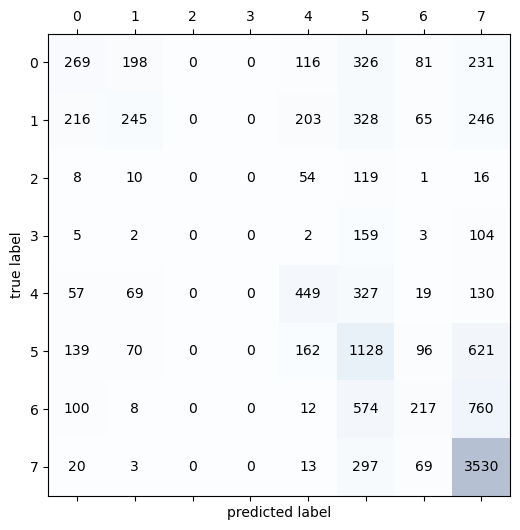

In [ ]:
confmat = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
# implement PCA using selected variance
pca = PCA(.95)

# fit training data to PCA
pca.fit(X_train)

#transform the standardized training data using PCA
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# show how many principal components there are
pca.n_components_

103

Text(0, 0.5, 'cumulative explained variance')

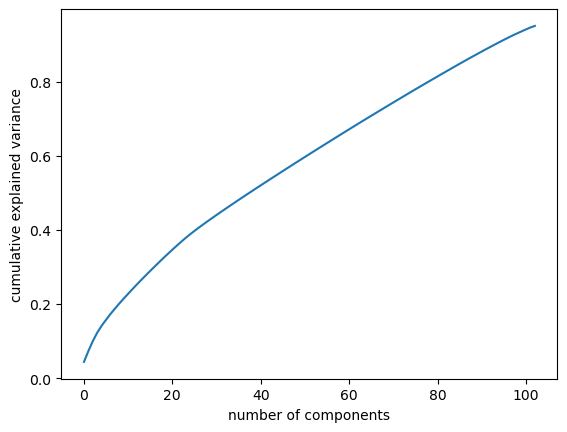

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# train LogReg model using output from PCA
lr_pca= lr.fit(X_train_pca, Y_train)

# show the score/accuracy of predictions
lr_pca.score(X_test_pca, Y_test)
print('Training accuracy:', lr.score(X_train_pca,Y_train))
print('Test accuracy:',lr.score(X_test_pca,Y_test))

Training accuracy: 0.49143230043785785
Test accuracy: 0.4872442535993938


In [ ]:
y_pred = lr_pca.predict(X_test_pca)

print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.332
Precision: 0.453
F1: 0.453
Recall: 0.487


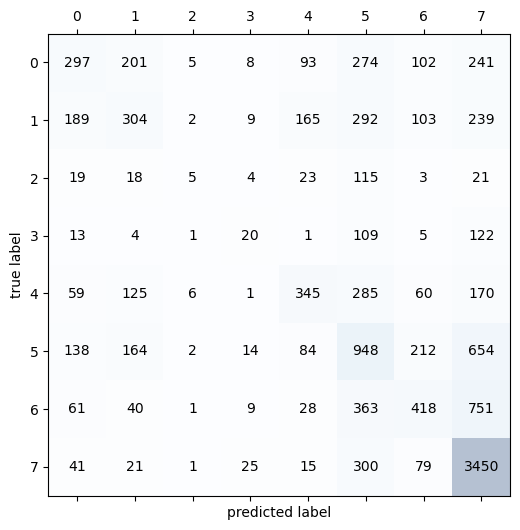

In [ ]:
confmat = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
sfm = SelectFromModel(rf_model,prefit=True).fit(X_train, Y_train)

In [ ]:
#sfm

sfm_train = sfm.transform(X_train)
sfm_test = sfm.transform(X_test)

In [ ]:
sfm_train.shape

(47504, 20)

In [ ]:
#print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

In [ ]:
# Train new classifier on 'important' dataset
lr_sfm = lr.fit(sfm_train,Y_train)

# Apply reduced feature classifer to test data
y_pred = lr_sfm.predict(sfm_test)

# View the accuracy of reduced feature model
print('Training accuracy:', lr_sfm.score(sfm_train,Y_train))
print('Test accuracy:',lr_sfm.score(sfm_test,Y_test))

Training accuracy: 0.47507578309195014
Test accuracy: 0.47554096152226993


In [ ]:
print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.311
Precision: 0.435
F1: 0.430
Recall: 0.476


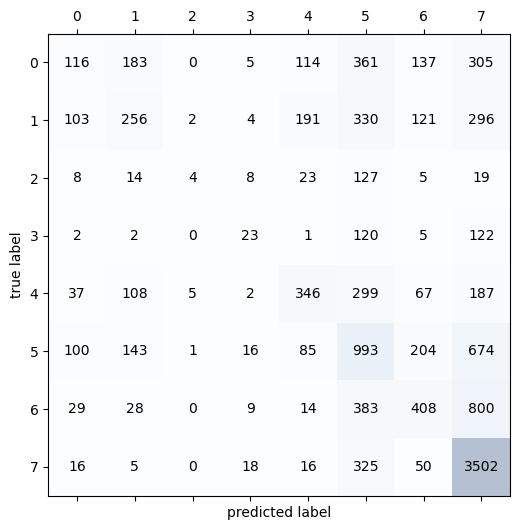

In [ ]:
confmat = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#rf_sfm
rf_sfm = rf_model.fit(sfm_train, Y_train)
y_pred = rf_sfm.predict(sfm_test)

print('Training accuracy:', rf_sfm.score(sfm_train, Y_train))
print('Test accuracy:', rf_sfm.score(sfm_test, Y_test))

Training accuracy: 0.4801069383630852
Test accuracy: 0.4778984592068704


In [ ]:
print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.297
Precision: 0.430
F1: 0.406
Recall: 0.478


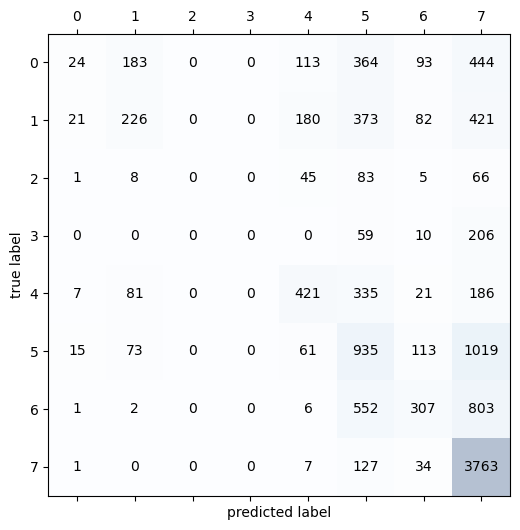

In [ ]:
confmat = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#mlp_sfm is the winner so far!
mlp_sfm= mlp.fit(sfm_train, Y_train)

print('Training accuracy:', mlp_sfm.score(sfm_train, Y_train))
print('Test accuracy:', mlp_sfm.score(sfm_test, Y_test))

Training accuracy: 0.4748442236443247
Test accuracy: 0.47596194325166286


In [ ]:
y_pred = mlp_sfm.predict(sfm_test)

print('Cohen Kappa %.3f' % cohen_kappa_score(
            Y_test,y_pred))
print('Precision: %.3f' % precision_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('F1: %.3f' % f1_score(
            y_true=Y_test,y_pred=y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(
                y_true=Y_test,y_pred=y_pred,average='weighted'))

Cohen Kappa 0.310
Precision: 0.370
F1: 0.405
Recall: 0.476


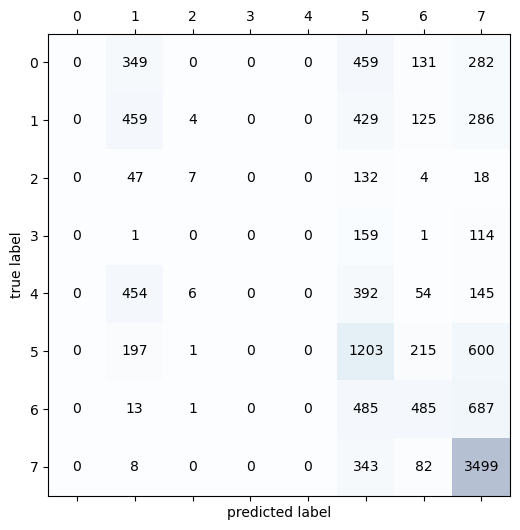

In [ ]:
confmat = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,
               s=confmat[i,j],
               va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
#match pca to sfm components identified (i.e. 29)
pca2 = PCA(n_components=29)

X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)

In [ ]:
lr_pca2 = lr.fit(X_train_pca2, Y_train)
print('Training accuracy:', lr_pca2.score(X_train_pca2,Y_train))
print('Test accuracy:',lr_pca2.score(X_test_pca2,Y_test))

Training accuracy: 0.45156197372852813
Test accuracy: 0.4478403637282142


In [ ]:
rf_pca2 = rf_model.fit(X_train_pca2, Y_train)
print('Training accuracy:', rf_pca2.score(X_train_pca2,Y_train))
print('Test accuracy:',rf_pca2.score(X_test_pca2,Y_test))

Training accuracy: 0.38422027618726845
Test accuracy: 0.3842721225898796


In [ ]:
#mlp fit to PCA2 output
mlp_pca2 = mlp.fit(X_train_pca2, Y_train)
print('Training accuracy:', mlp_pca2.score(X_train_pca2, Y_train))
print('Test accuracy:', mlp_pca2.score(X_test_pca2, Y_test))

Training accuracy: 0.447499157965645
Test accuracy: 0.44270438662962025


In [ ]:
# cross validation
pipe_lr = Pipeline([('scl',StandardScaler()),
                    ('clf', rf_sfm)])

scores = cross_val_score(estimator=pipe_lr,X=imputed_data,y=response, cv=5,n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.41584575 0.42185921 0.41840687 0.40914449 0.40476591]
CV accuracy: 0.414 +/- 0.006


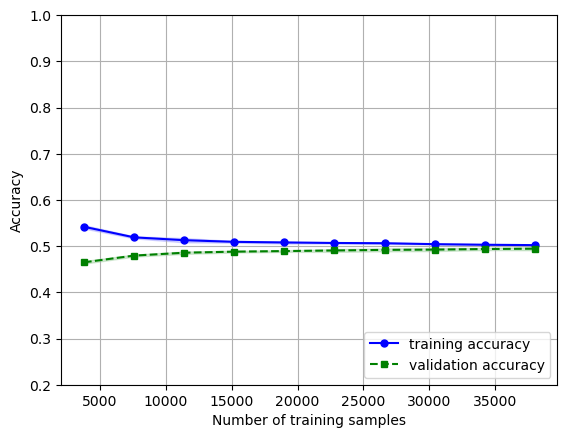

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores = learning_curve(estimator = lr_sfm,
                                                      X=X_train,
                                                      y=Y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10),
                                                      cv=5,
                                                      n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2,1.0])
plt.show()

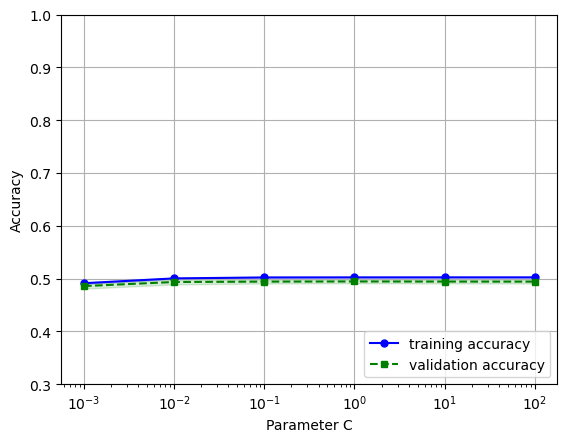

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]

train_scores,test_scores = validation_curve(
            estimator=lr_sfm,
            X=X_train,y=Y_train,
            param_name='C',param_range=param_range, cv=5,n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.show()

In [ ]:
cohen_kappa_score(Y_test,y_pred)

0.3098582752394592

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

balanced_bagging = BalancedBaggingClassifier(estimator=rf_sfm,
                                             n_estimators=10, #default 10
                                             sampler=RandomUnderSampler(), #this is the default
                                             sampling_strategy='all', #experimented with majority, lost to brf
                                             replacement=True,
                                             random_state=0,
                                             n_jobs=-1)

balanced_bagging = balanced_bagging.fit(X_train, Y_train)

print('Training accuracy:', balanced_bagging.score(X_train, Y_train))
print('Test accuracy:',balanced_bagging.score(X_test,Y_test))

Training accuracy: 0.4192068036375884
Test accuracy: 0.4168561084448935


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

balanced_forest = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True,
                                                 class_weight='balanced',
                                                 random_state=0, n_jobs=-1)

balanced_forest = balanced_forest.fit(X_train, Y_train)
print('Training accuracy:', balanced_forest.score(X_train, Y_train))
print('Test accuracy:',balanced_forest.score(X_test,Y_test))

Training accuracy: 0.6126852475581004
Test accuracy: 0.4420308158625916


In [ ]:
rus = RandomUnderSampler(random_state=0)
train_data_res, train_labels_res = rus.fit_resample(X_train, Y_train)

In [ ]:
rf_sfm = rf_sfm.fit(train_data_res,train_labels_res)
print('Training accuracy:', rf_sfm.score(train_data_res,train_labels_res))
print('Test accuracy:',rf_sfm.score(X_test,Y_test))

Training accuracy: 0.4166149068322981
Test accuracy: 0.4039740675254694


In [ ]:
clf1 = LogisticRegression(random_state=0,
                          solver='lbfgs',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(criterion='entropy',
                              n_estimators=1000,
                              random_state=0,
                              n_jobs=-1)
clf3 = BalancedBaggingClassifier(random_state=0,
                base_estimator=RandomForestClassifier(criterion='entropy',
                n_estimators=1000,
                random_state=0,
                n_jobs=-1),
                #ratio='auto'
                replacement=False)

pipe1 = Pipeline([['sc',StandardScaler()],
                ['clf',clf1]])
pipe3 = Pipeline([['src',StandardScaler()],
                ['clf',clf3]])
clf_labels = ['Logistic Regression', 'Random Forest','Balanced Bagging']

#print('10-fold cross validation:\n')
#for clf, label in zip([pipe1,clf2,pipe3], clf_labels):
    #scores = cross_val_score(estimator=clf, X=imputed_data, y=response,cv=5, scoring='roc_auc')
    #print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
         #% (scores.mean(),scores.std(),label))